# Introduction
Before buying a house, there are many factors a potential house buyer considers.A buyer would like to get a rough estimate of the fair price of a house/flat. 
Also if someone is into houseflipping business, predicting the house prices is a crucial component if he/she wants to make profit.

# Dataset
This dataset has 9 columns where the target variable is price. The independent variables are factors like number of bathrooms, total sqft area, type of location etc

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import re
from datetime import datetime

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

<AxesSubplot:>

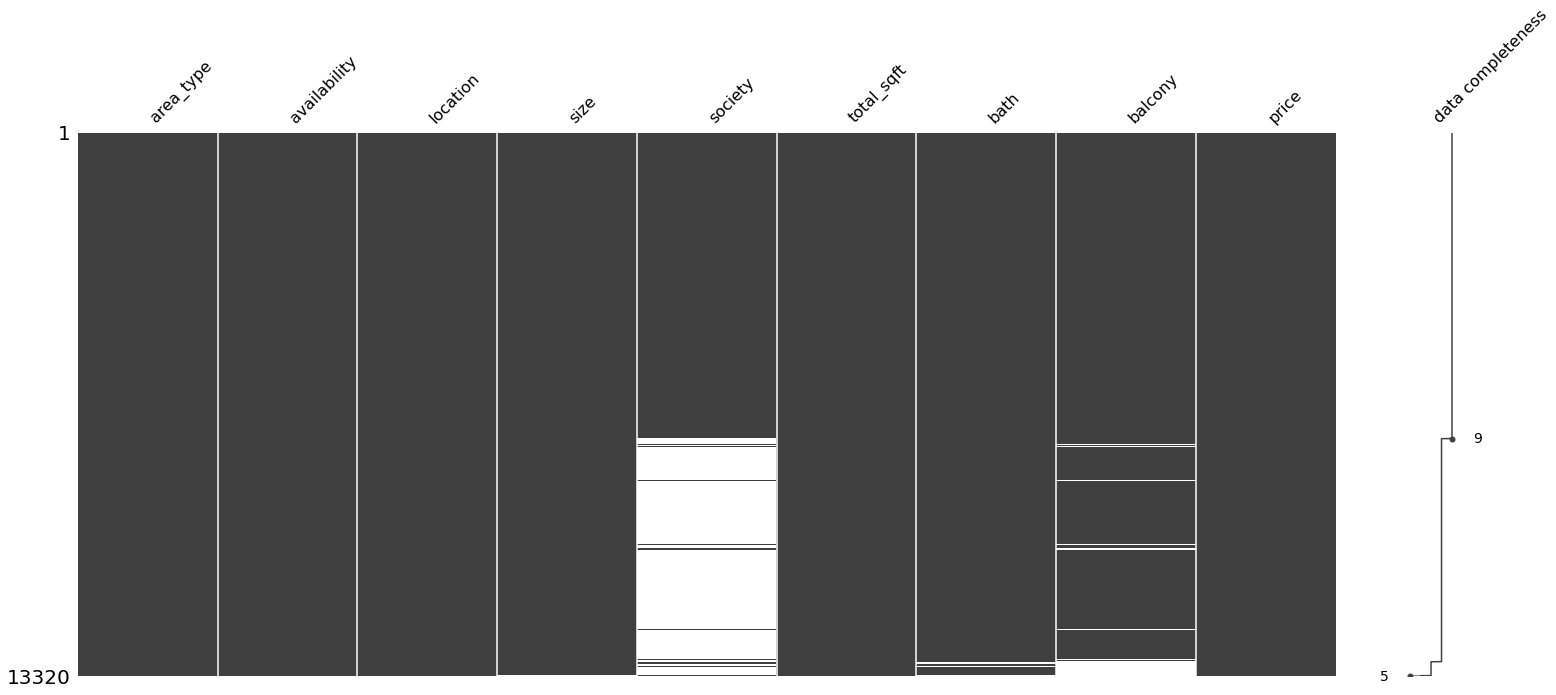

In [6]:
import missingno as msno

msno.matrix(df, labels=True, sort="descending")

In [7]:
#we are dropping society column as society columns has more than 30% values missing
df1=df.drop(["society"],axis=1)

# Changing features

We are making modifications on some features as they are not in proper format.For features like size, availability and total_sqft area, the format is not how we want. We will extract only the number from the size column
Availability columns has the date or the time duration by which the house will be available. We are only extracting the month from there, and "Ready to Move" and "Immediate Possession" For extracting the area we needed to write a function which called 4 other functions that have been created.

In [8]:
#extracting number from string
df1["bhk"]=df1["size"].apply(lambda x:float(str(x).split(" ")[0]))

In [9]:
df2=df1.drop("size",axis=1)

In [10]:
def month_finder(month):
    if month=="Ready To Move" or month=="Immediate Possession":
        return month
    else:
        return month[-3:]

In [11]:
# returning only month,ready to move and immediate possession from availability column
df2["available"]=df2.availability.apply(month_finder)

In [12]:
df2.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,available
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2.0,Dec
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0,Ready To Move
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3.0,Ready To Move
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0,Ready To Move
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2.0,Ready To Move


In [13]:
df2=df2.drop("availability",axis=1)

In [14]:
#checking if a datatype is float 
def float_check(f):
    try:
        float(f)
    except:
        return False
    return True
#Extracting string 
def string_extractor(s):
    r=re.compile("\D+")
    return("".join(r.findall(s)))
#Extracting number
def float_extractor(s):
    r=re.compile(r"\d+\.*\d*")
    return(float(r.findall(s)[0]))

#convertimg from other units to sq feet
def convertor(unit,string):
    if string in [".Sq. Meter","Sq. Meter"]:
        return(unit*10.7639)
    elif string in ["Sq. Yards",".Sq. Yards"]:
        return(unit*9)
    elif string in [".Acres","Acres"]:
        return(unit*43560)
    elif string in ["Cents"]:
        return(unit*435.56)
    elif string in ["Guntha"]:
        return(unit*1089)
    elif string=="Grounds":
        return unit*2400
    elif string=="Perch":
        return unit*272.25
    else:
        return None 
    
def float_extract1(n):
    if float_check(n)==True: #check if the datatype of a column is float
        return float(n)
    else:
        try:
            x=n.split("-") # for cases like '1705-1805'
            return (float(x[0])+float(x[1]))/2
        except:
            s,f=string_extractor(n),float_extractor(n) # for handling cases like 3.26 Guntha
            k=convertor(f,s)
            return k

In [15]:
df3=df2.copy()

In [16]:
#getting area by applying those functions
df3["Area"]=df3["total_sqft"].apply(float_extract1)

In [17]:
df3.isnull().sum()

area_type       0
location        1
total_sqft      0
bath           73
balcony       609
price           0
bhk            16
available       0
Area            0
dtype: int64

In [18]:
df3.head(5)

,area_type,location,total_sqft,bath,balcony,price,bhk,available,Area
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2.0,Dec,1056.0
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0,Ready To Move,2600.0
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3.0,Ready To Move,1440.0
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0,Ready To Move,1521.0
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2.0,Ready To Move,1200.0


In [19]:
df4=df3.drop(["total_sqft"],axis=1)

In [20]:
df4.head()

,area_type,location,bath,balcony,price,bhk,available,Area
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2.0,Dec,1056.0
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4.0,Ready To Move,2600.0
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3.0,Ready To Move,1440.0
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3.0,Ready To Move,1521.0
4,Super built-up Area,Kothanur,2.0,1.0,51.00,2.0,Ready To Move,1200.0


<AxesSubplot:>

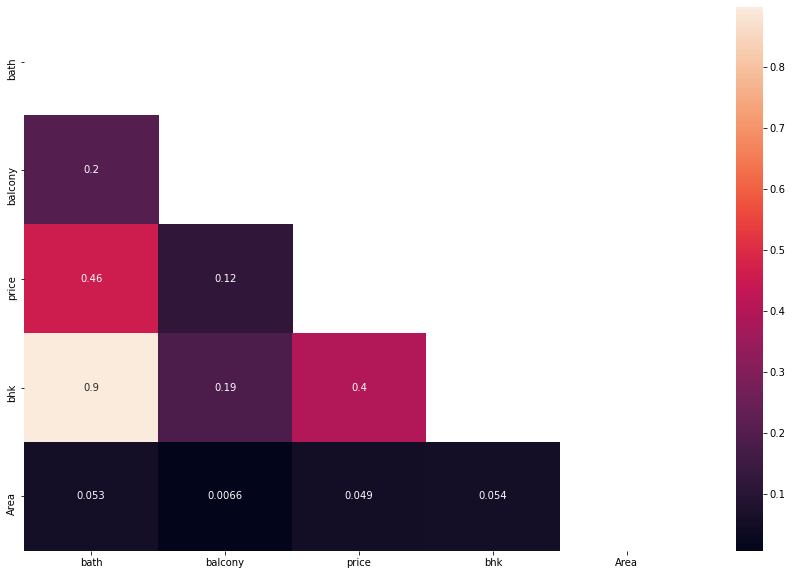

In [21]:
corr=df4.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(15,10))
sns.heatmap(corr,mask=mask,annot=True)

In [22]:
#Since bhk and bath are having high correlation, we are dropping bath
df4=df4.drop("bath",axis=1)

In [23]:
df4["ppsft"]=(df4["price"]/df4["Area"])*100000

In [24]:
df4.head()

,area_type,location,balcony,price,bhk,available,Area,ppsft
0,Super built-up Area,Electronic City Phase II,1.0,39.07,2.0,Dec,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,3.0,120.00,4.0,Ready To Move,2600.0,4615.384615
2,Built-up Area,Uttarahalli,3.0,62.00,3.0,Ready To Move,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1.0,95.00,3.0,Ready To Move,1521.0,6245.890861
4,Super built-up Area,Kothanur,1.0,51.00,2.0,Ready To Move,1200.0,4250.000000


# Checking some features

In [25]:
df4.bhk.value_counts()

2.0     5528
3.0     4857
4.0     1417
1.0      656
5.0      356
6.0      221
7.0      100
8.0       89
9.0       54
10.0      14
11.0       4
18.0       1
14.0       1
43.0       1
12.0       1
13.0       1
19.0       1
27.0       1
16.0       1
Name: bhk, dtype: int64

In [26]:
df4=df4[~(df4.bhk>=10)]

In [27]:
df4.balcony.value_counts()

2.0    5112
1.0    4897
3.0    1667
0.0    1024
Name: balcony, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

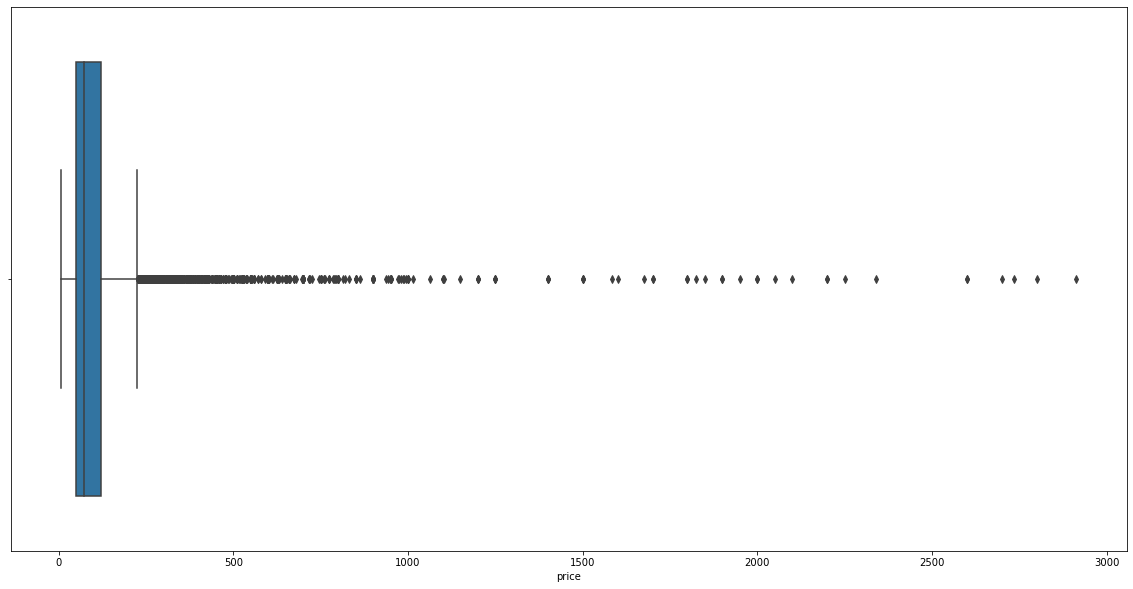

In [28]:
sns.boxplot(df4.price)

In [29]:
df4.price.describe()

count    13294.000000
mean       111.952320
std        145.603918
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       2912.000000
Name: price, dtype: float64

In [31]:
df4=df4[df4.price<=500]

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area'>

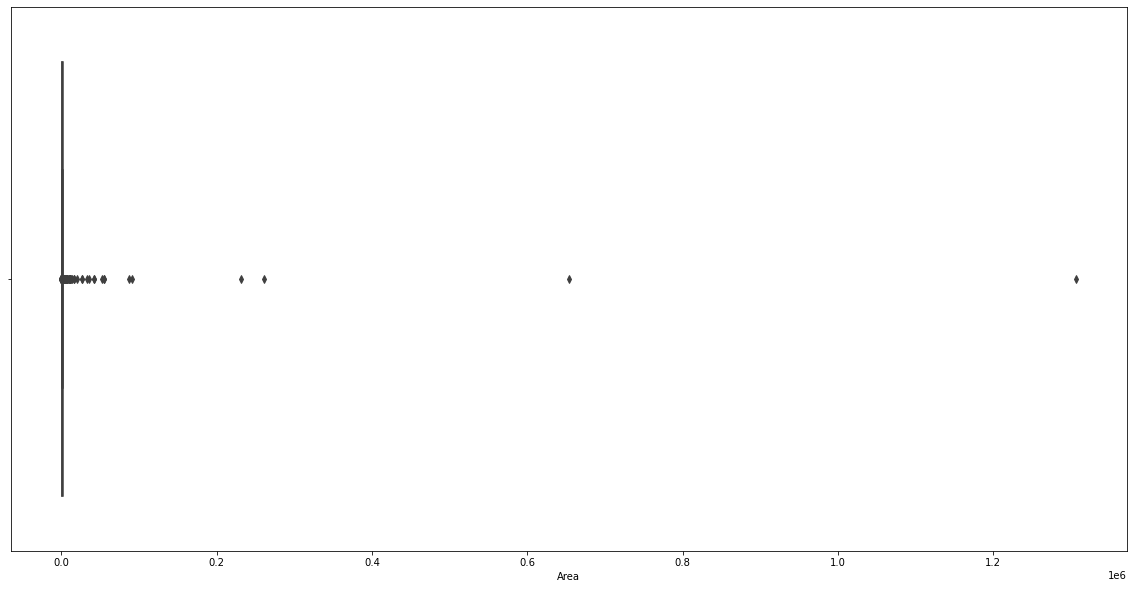

In [32]:
sns.boxplot(df4.Area)

<AxesSubplot:ylabel='Frequency'>

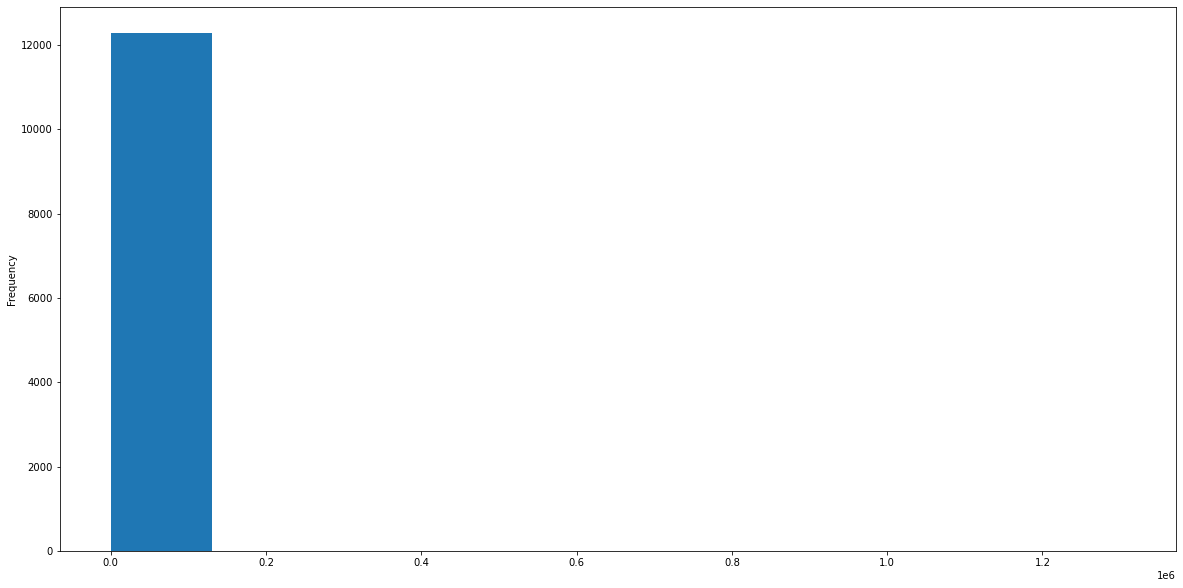

In [33]:
df4.Area.plot.hist()

In [34]:
df4=df4[df4.Area<=9000]

<AxesSubplot:ylabel='Frequency'>

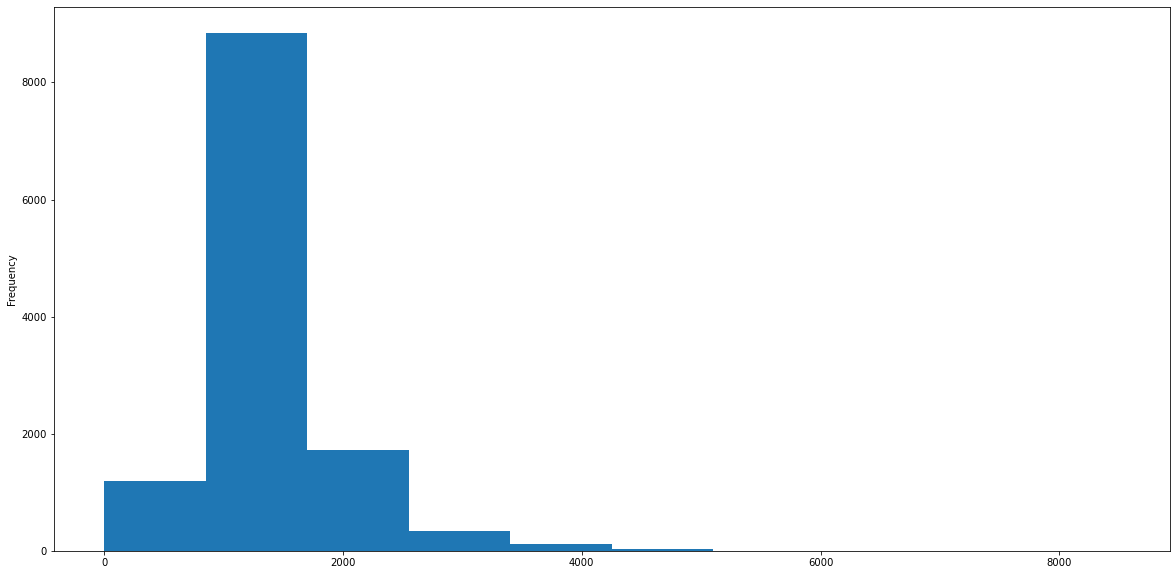

In [35]:
df4.Area.plot.hist()

In [36]:
df4.Area.describe()

count    12262.000000
mean      1382.671693
std        574.982972
min          1.000000
25%       1085.000000
50%       1245.000000
75%       1567.800000
max       8500.000000
Name: Area, dtype: float64

In [37]:
df4.shape

(12262, 8)

# Boxplots

In [38]:
df4.head()

,area_type,location,balcony,price,bhk,available,Area,ppsft
0,Super built-up Area,Electronic City Phase II,1.0,39.07,2.0,Dec,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,3.0,120.00,4.0,Ready To Move,2600.0,4615.384615
2,Built-up Area,Uttarahalli,3.0,62.00,3.0,Ready To Move,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1.0,95.00,3.0,Ready To Move,1521.0,6245.890861
4,Super built-up Area,Kothanur,1.0,51.00,2.0,Ready To Move,1200.0,4250.000000


In [39]:
def box(c):
    sns.boxplot(x=c,y="price",data=df4)

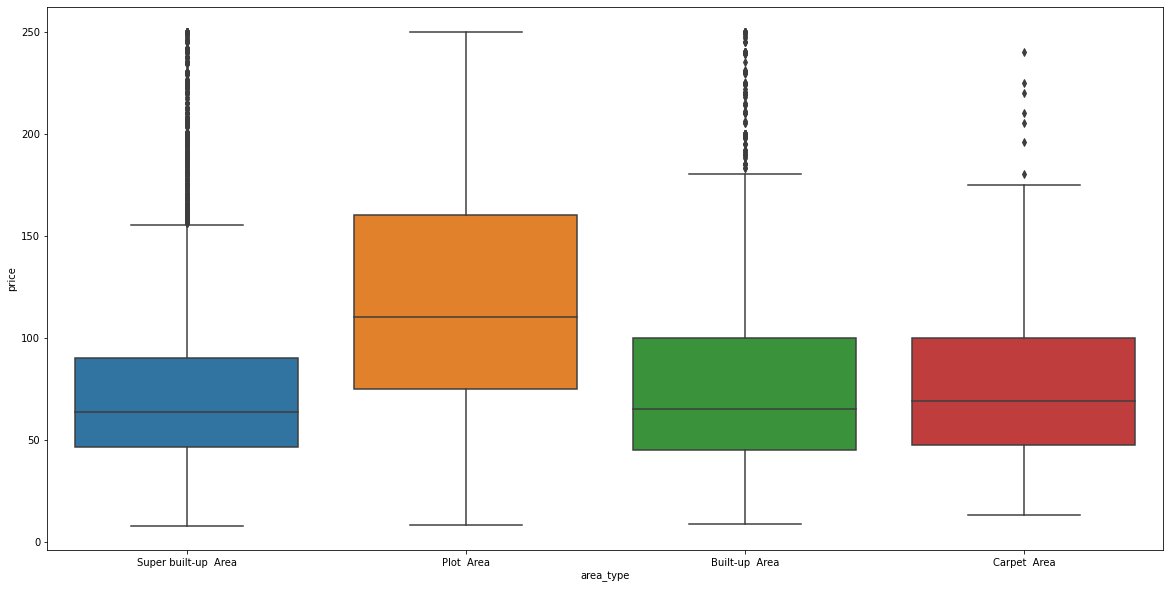

In [40]:
box("area_type")

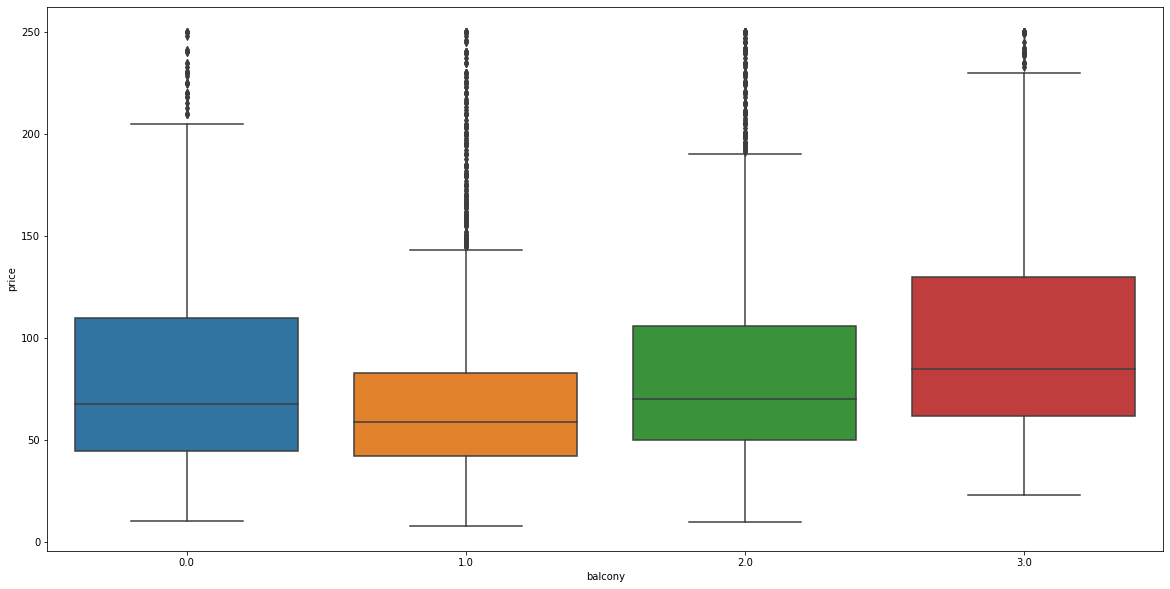

In [41]:
box("balcony")

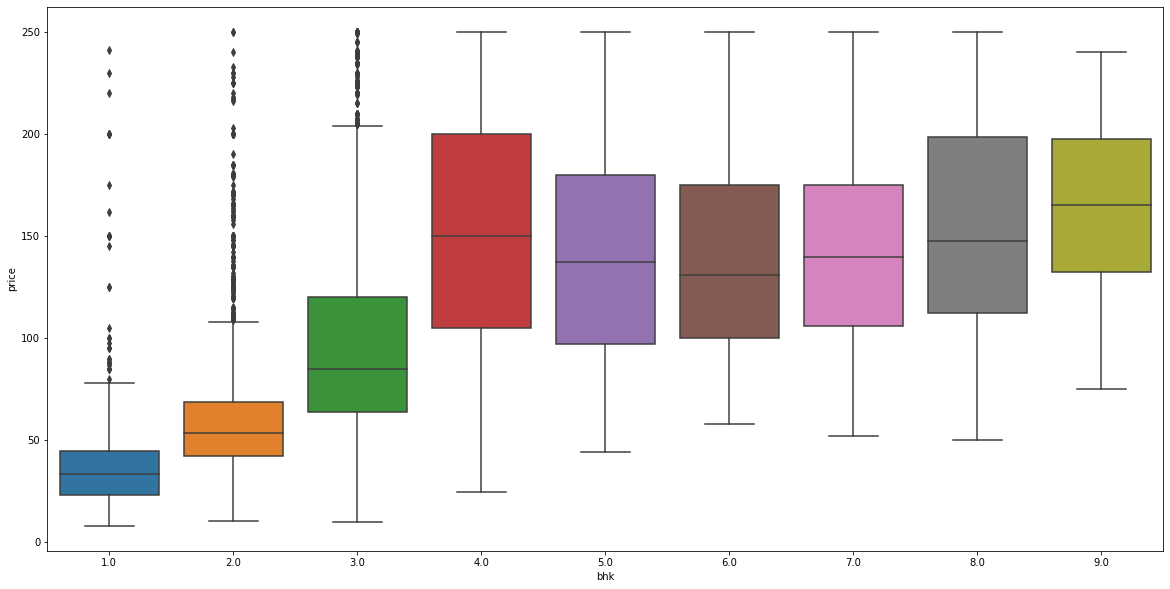

In [42]:
box("bhk")

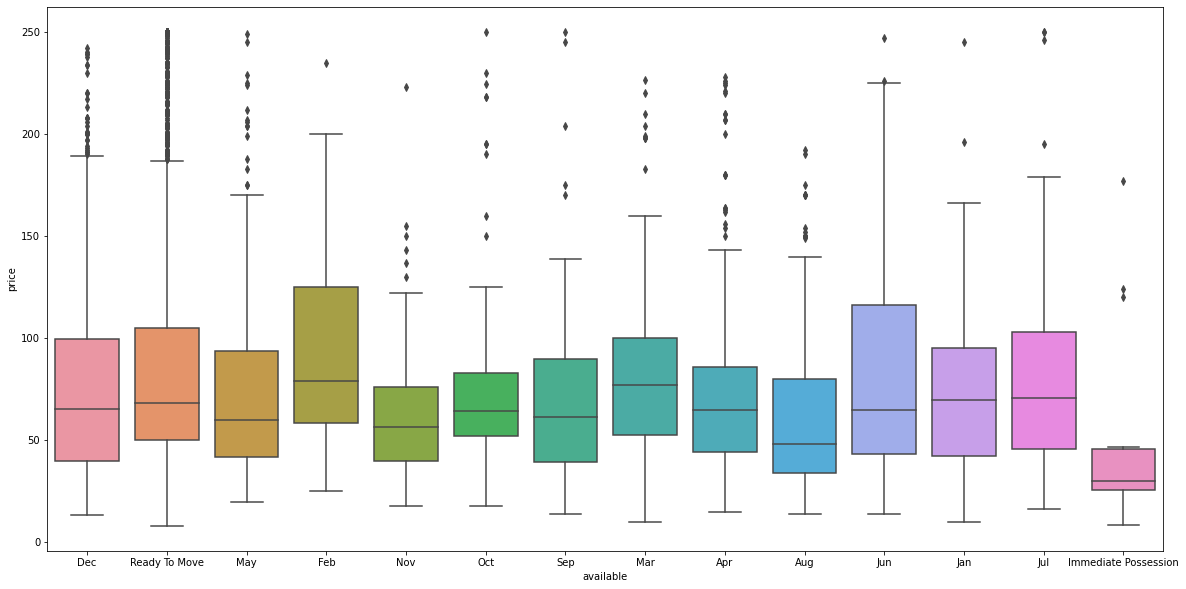

In [43]:
box("available")

# Linear Regression for Area vs Price

<AxesSubplot:xlabel='Area', ylabel='price'>

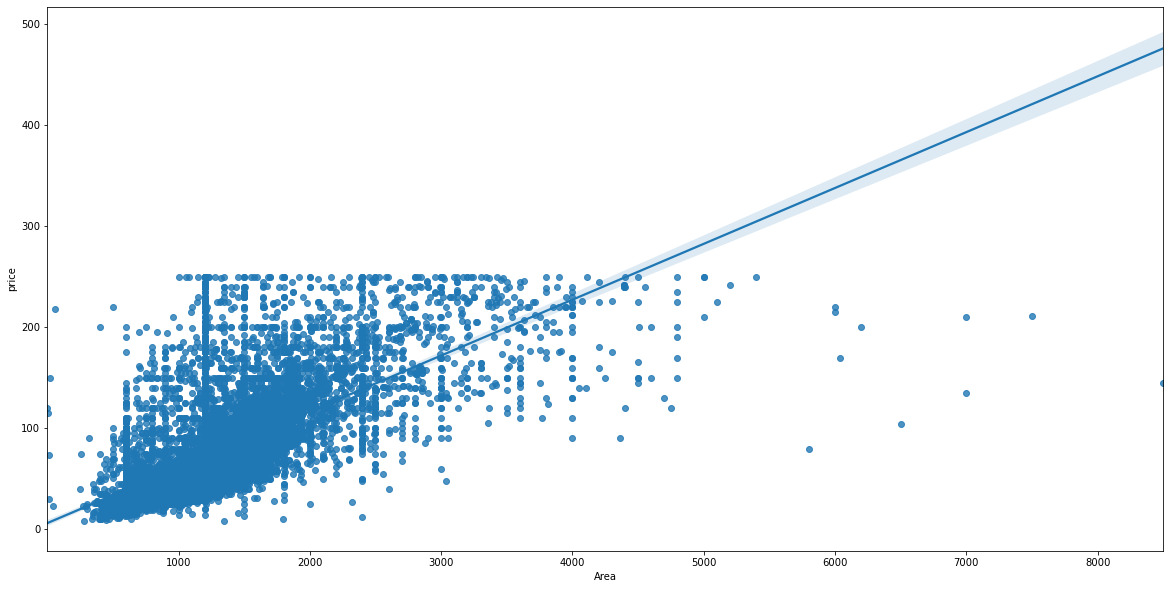

In [44]:
sns.regplot(x="Area",y="price",data=df4)

In [45]:
import statsmodels.api as sm
y=df4.price

In [46]:
def regression_results(x):
    x=sm.add_constant(x)
    model=sm.OLS(y,x).fit()
    print(model.summary())

In [47]:
regression_results(df4.Area)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     8948.
Date:                Sat, 18 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:29:52   Log-Likelihood:                -61739.
No. Observations:               12262   AIC:                         1.235e+05
Df Residuals:                   12260   BIC:                         1.235e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1635      0.875      7.046      0.0

# Tukey Test

In [48]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd,MultiComparison

In [49]:
def tukeytest(col):
    mc=MultiComparison(df4["price"],df4[col])
    mcresult=mc.tukeyhsd(0.05)
    print(mcresult.summary())

In [50]:
df4.columns

Index(['area_type', 'location', 'balcony', 'price', 'bhk', 'available', 'Area',
       'ppsft'],
      dtype='object')

In [51]:
tuk=df4.columns[[0,5]]

In [52]:
for i in tuk:
    tukeytest(i)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
    group1            group2        meandiff p-adj  lower    upper  reject
--------------------------------------------------------------------------
Built-up  Area         Carpet  Area   0.3343   0.9 -12.8474 13.5159  False
Built-up  Area           Plot  Area  41.2698 0.001  37.3361 45.2036   True
Built-up  Area Super built-up  Area  -5.7895 0.001   -8.626  -2.953   True
  Carpet  Area           Plot  Area  40.9356 0.001  27.6489 54.2222   True
  Carpet  Area Super built-up  Area  -6.1238 0.606 -19.1279  6.8804  False
    Plot  Area Super built-up  Area -47.0593 0.001 -50.3497 -43.769   True
--------------------------------------------------------------------------
               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------------
    

In [53]:
df4.shape

(12262, 8)

In [54]:
#not much difference can be found out, so we are dropping the available column
df5=df4.drop("available",axis=1)

# Missing values

In [55]:
df5.isnull().sum()

area_type      0
location       1
balcony      411
price          0
bhk           14
Area           0
ppsft          0
dtype: int64

In [56]:
df5

,area_type,location,balcony,price,bhk,Area,ppsft
0,Super built-up Area,Electronic City Phase II,1.0,39.07,2.0,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,3.0,120.00,4.0,2600.0,4615.384615
2,Built-up Area,Uttarahalli,3.0,62.00,3.0,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1.0,95.00,3.0,1521.0,6245.890861
4,Super built-up Area,Kothanur,1.0,51.00,2.0,1200.0,4250.000000
...,...,...,...,...,...,...,...
13313,Super built-up Area,Uttarahalli,1.0,57.00,3.0,1345.0,4237.918216
13314,Super built-up Area,Green Glen Layout,3.0,112.00,3.0,1715.0,6530.612245
13315,Built-up Area,Whitefield,0.0,231.00,5.0,3453.0,6689.834926
13317,Built-up Area,Raja Rajeshwari Nagar,1.0,60.00,2.0,1141.0,5258.545136


In [57]:
df5=df5.reset_index()
df5

,index,area_type,location,balcony,price,bhk,Area,ppsft
0,0,Super built-up Area,Electronic City Phase II,1.0,39.07,2.0,1056.0,3699.810606
1,1,Plot Area,Chikka Tirupathi,3.0,120.00,4.0,2600.0,4615.384615
2,2,Built-up Area,Uttarahalli,3.0,62.00,3.0,1440.0,4305.555556
3,3,Super built-up Area,Lingadheeranahalli,1.0,95.00,3.0,1521.0,6245.890861
4,4,Super built-up Area,Kothanur,1.0,51.00,2.0,1200.0,4250.000000
...,...,...,...,...,...,...,...,...
12257,13313,Super built-up Area,Uttarahalli,1.0,57.00,3.0,1345.0,4237.918216
12258,13314,Super built-up Area,Green Glen Layout,3.0,112.00,3.0,1715.0,6530.612245
12259,13315,Built-up Area,Whitefield,0.0,231.00,5.0,3453.0,6689.834926
12260,13317,Built-up Area,Raja Rajeshwari Nagar,1.0,60.00,2.0,1141.0,5258.545136


In [58]:
df6=df5.drop(["index"],axis=1)

In [59]:
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer
#from sklearn.impute import KNNImputer

In [60]:
#imp_data=df6[["bath","balcony","bhk"]]

In [61]:
df7=df6.copy()

In [62]:
def prob_imputer(col):
    p=df6[col].value_counts(normalize=True)
    nos=df6[col].isna().sum()
    sample=np.random.choice(p.index,nos,p=p)
    s=[]
    k=0
    for i in range(df6.shape[0]):
        a=df6.iloc[i,:][col]
        if str(a)=="nan":
            s.append(sample[k])
            k+=1
        else:
            s.append(a)
    df7[col]=pd.Series(s)
        

In [63]:
df6.isnull().sum()

area_type      0
location       1
balcony      411
price          0
bhk           14
Area           0
ppsft          0
dtype: int64

In [64]:
prob_imputer("balcony")

In [65]:
df7.head()

,area_type,location,balcony,price,bhk,Area,ppsft
0,Super built-up Area,Electronic City Phase II,1.0,39.07,2.0,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,3.0,120.00,4.0,2600.0,4615.384615
2,Built-up Area,Uttarahalli,3.0,62.00,3.0,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1.0,95.00,3.0,1521.0,6245.890861
4,Super built-up Area,Kothanur,1.0,51.00,2.0,1200.0,4250.000000


In [66]:
prob_imputer("bhk")

In [67]:
df7.head()

,area_type,location,balcony,price,bhk,Area,ppsft
0,Super built-up Area,Electronic City Phase II,1.0,39.07,2.0,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,3.0,120.00,4.0,2600.0,4615.384615
2,Built-up Area,Uttarahalli,3.0,62.00,3.0,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1.0,95.00,3.0,1521.0,6245.890861
4,Super built-up Area,Kothanur,1.0,51.00,2.0,1200.0,4250.000000


In [68]:
df7.isna().sum()

area_type    0
location     1
balcony      0
price        0
bhk          0
Area         0
ppsft        0
dtype: int64

In [69]:
df7=df7.dropna()
df7.shape

(12261, 7)

# Location

In [70]:
df7a=df7.copy()

In [71]:
df7['location'] = df7['location'].apply(lambda x: str(x).strip())

In [72]:
location_count=df7.location.value_counts()
location_count_10 = location_count[location_count < 4]
df7['location'] = df7['location'].apply(lambda x: 'other' if x in location_count_10 else x)

In [73]:
df7.location.value_counts()

other                 1143
Whitefield             474
Sarjapur  Road         367
Electronic City        303
Kanakpura Road         271
                      ... 
OLd Gurappanapalya       4
HMT Layout               4
Tavarekere               4
Anand Nagar              4
Bellari Road             4
Name: location, Length: 477, dtype: int64

In [74]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12261 entries, 0 to 12261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area_type  12261 non-null  object 
 1   location   12261 non-null  object 
 2   balcony    12261 non-null  float64
 3   price      12261 non-null  float64
 4   bhk        12261 non-null  float64
 5   Area       12261 non-null  float64
 6   ppsft      12261 non-null  float64
dtypes: float64(5), object(2)
memory usage: 670.5+ KB


# Visualizing price of flats in one location


In [75]:
df7.location.value_counts()

other                 1143
Whitefield             474
Sarjapur  Road         367
Electronic City        303
Kanakpura Road         271
                      ... 
OLd Gurappanapalya       4
HMT Layout               4
Tavarekere               4
Anand Nagar              4
Bellari Road             4
Name: location, Length: 477, dtype: int64

In [76]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [77]:
df7.shape

(12261, 7)

In [78]:
##for a particular location,we are removing those houses whose price per square feet are higher than mean + standard deviation
#of prices or lower than mean-standard deviation of prices
def rmv_outlierBy_std():
    out_df = pd.DataFrame()
    for i in df.location.unique():
        subdf=df7[df7.location==i]
        mean = subdf.ppsft.mean()
        std = subdf.ppsft.std()
        reduced_df = subdf[(subdf.ppsft > (mean - std)) & (subdf.ppsft < (mean + std))]
        out_df = out_df.append(reduced_df, ignore_index = True)
    return out_df

df8= rmv_outlierBy_std()

In [79]:
df8.shape

(8893, 7)

In [80]:
#Here we have created a function that will display the prices of flats in a locality based on 2 bhk values that we will give
def visualize(location,num1,num2,dframe):
    bhka=dframe[(dframe.location==location)&(dframe.bhk==num1)]
    bhkb=dframe[(dframe.location==location)&(dframe.bhk==num2)]
    sns.set_style("whitegrid")
    sns.scatterplot(bhka.Area,bhka.price,color="orange",s=40,label=num1)
    sns.scatterplot(bhkb.Area,bhkb.price,color="blue",s=60,label=num2)
    plt.title(location)
    plt.legend()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


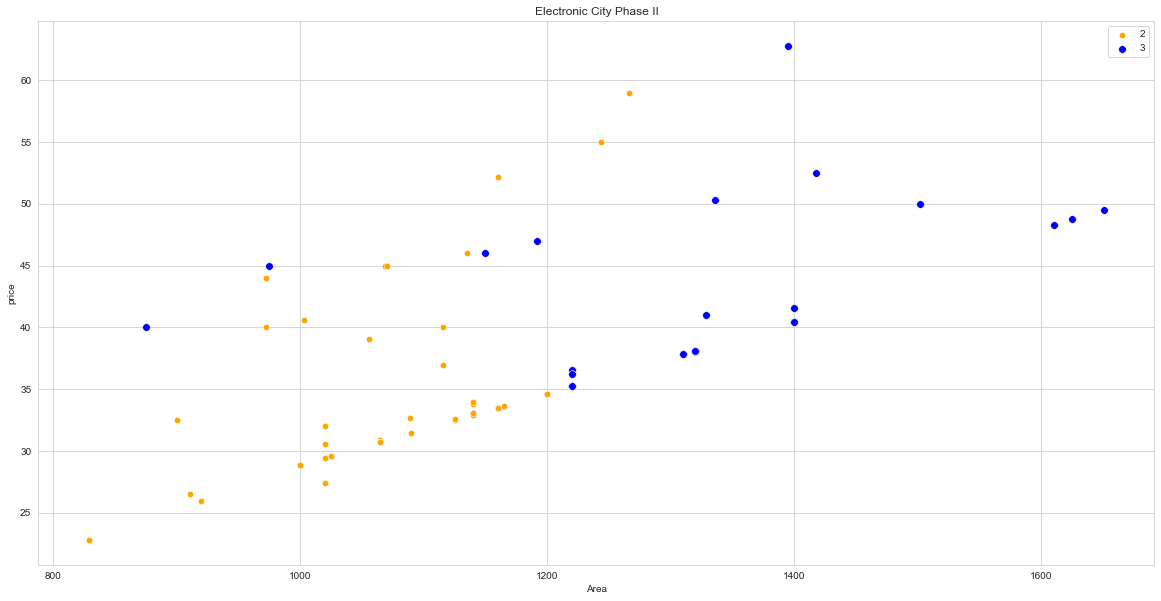

In [81]:
visualize("Electronic City Phase II",2,3,df8)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


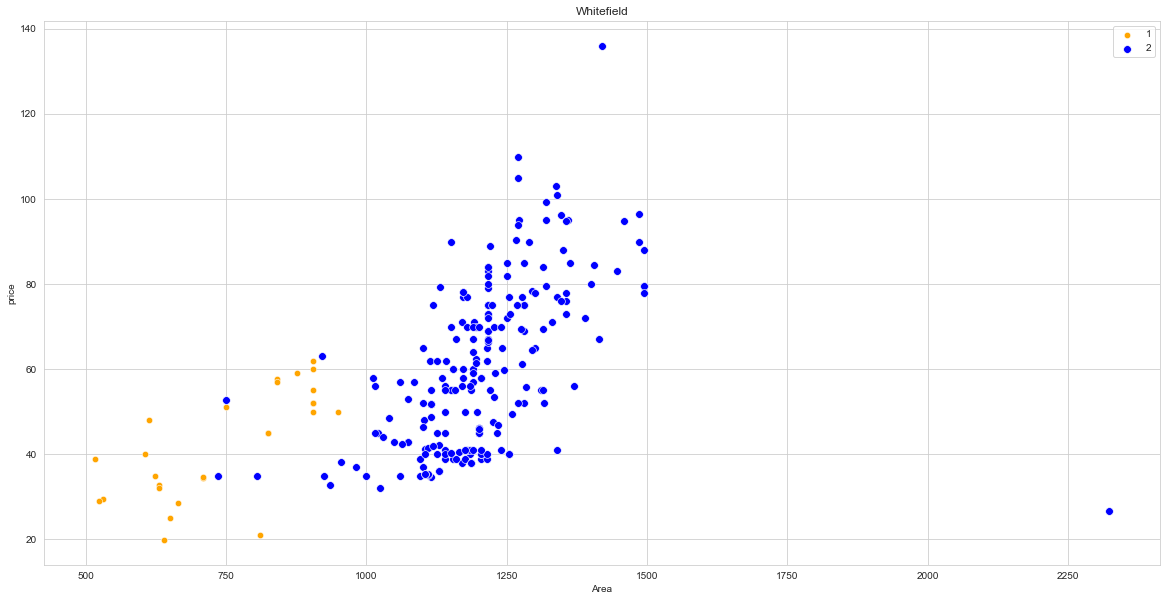

In [82]:
visualize("Whitefield",1,2,df8)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


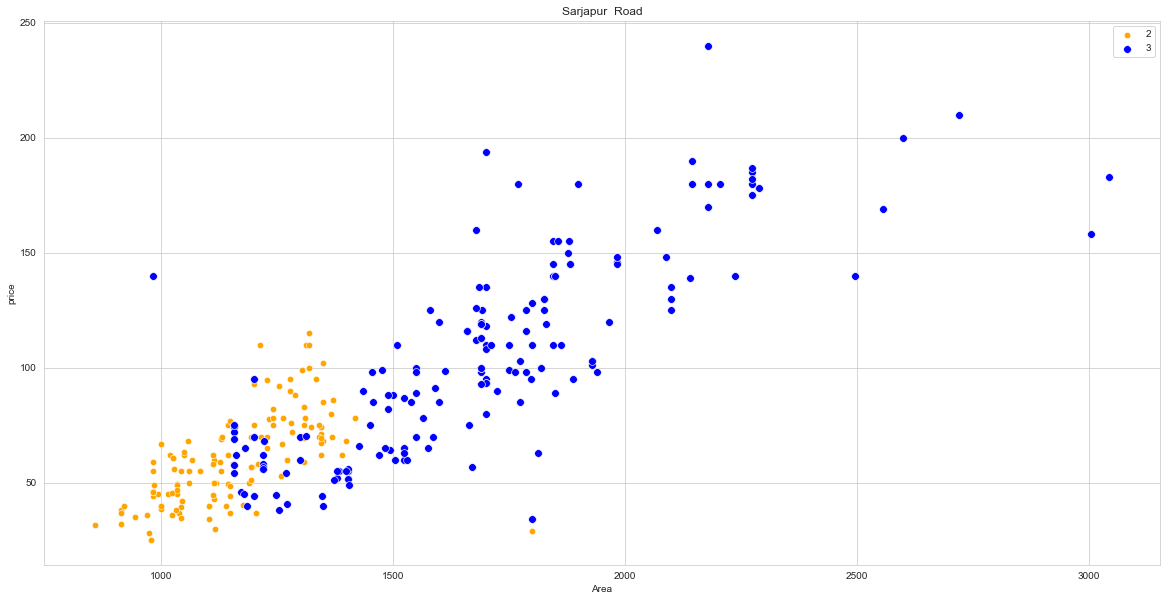

In [83]:
visualize("Sarjapur  Road",2,3,df8)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


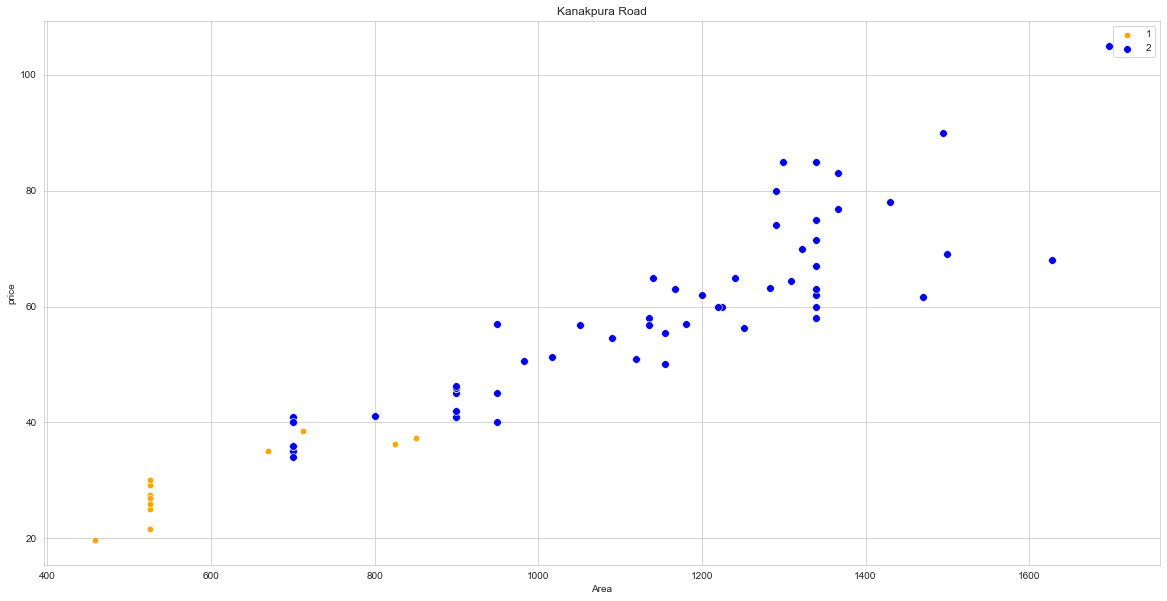

In [84]:
visualize("Kanakpura Road",1,2,df8)

We can see that from the same Locality, there are flats with lesser bhk but having price higher than flats with more bhk.So we are removing them

In [85]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df8.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.ppsft),
                'std': np.std(bhk_df.ppsft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>6:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.ppsft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df9 = remove_bhk_outliers(df8)

In [86]:
df9.shape

(7145, 7)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


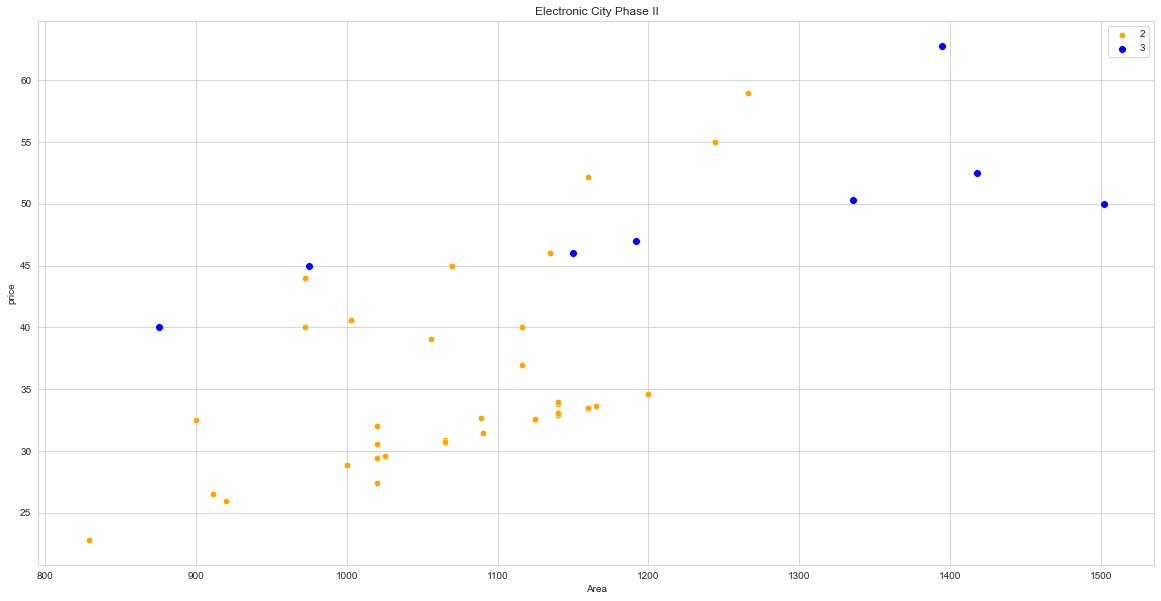

In [87]:
visualize("Electronic City Phase II",2,3,df9)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


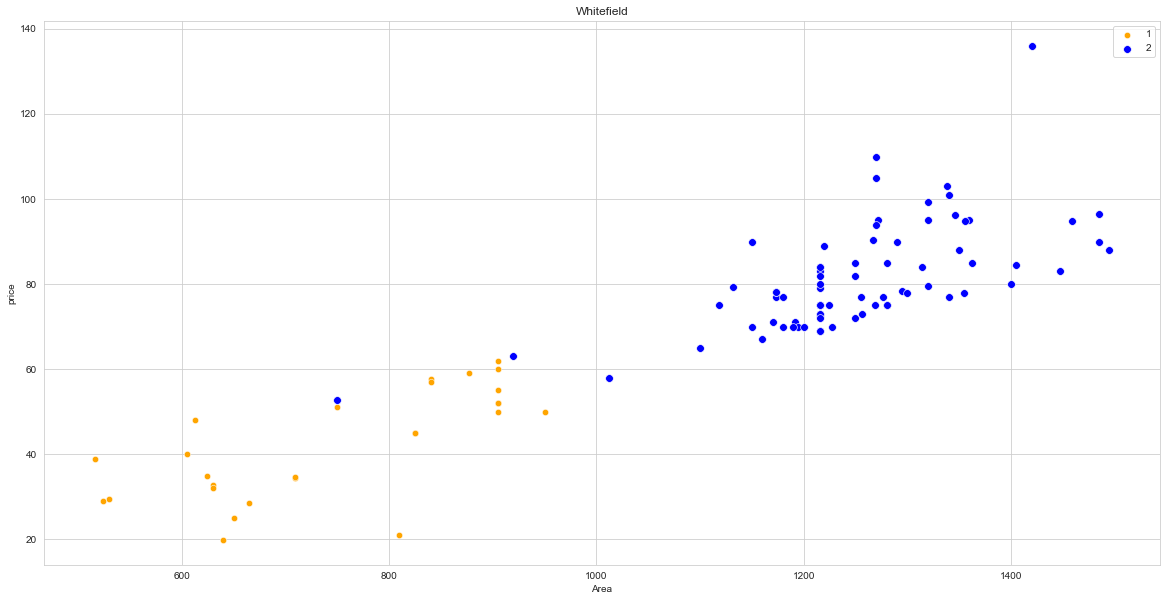

In [88]:
visualize("Whitefield",1,2,df9)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


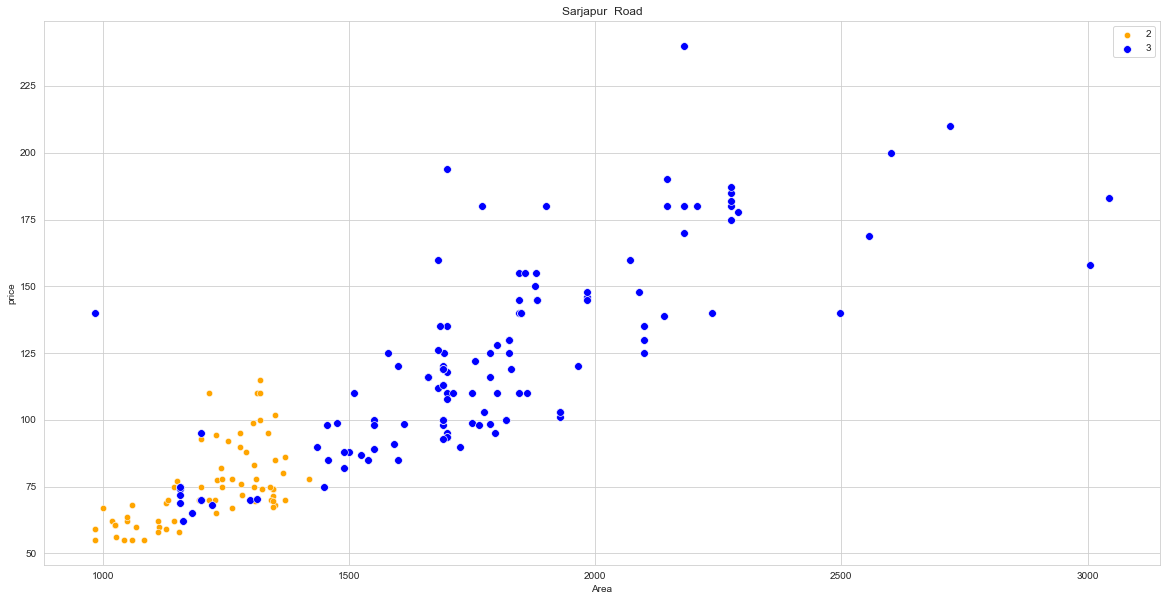

In [89]:
visualize("Sarjapur  Road",2,3,df9)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


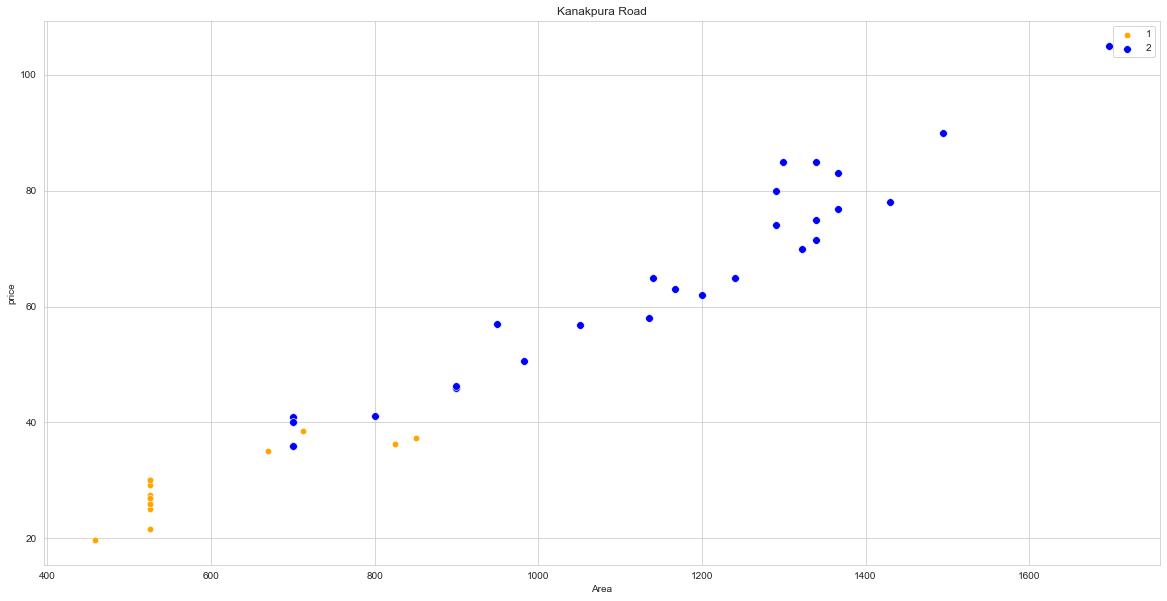

In [90]:
visualize("Kanakpura Road",1,2,df9)

# Modelling

In [91]:
df9.head()

,area_type,location,balcony,price,bhk,Area,ppsft
0,Super built-up Area,Electronic City Phase II,1.0,39.07,2.0,1056.0,3699.810606
1,Super built-up Area,Electronic City Phase II,1.0,30.60,2.0,1020.0,3000.000000
2,Super built-up Area,Electronic City Phase II,2.0,45.00,2.0,1069.0,4209.541628
3,Super built-up Area,Electronic City Phase II,1.0,28.35,1.0,630.0,4500.000000
5,Super built-up Area,Electronic City Phase II,0.0,98.88,4.0,2225.0,4444.044944


In [92]:
df9=df9.drop("ppsft",axis=1)

In [93]:
cat=df9[["area_type","location"]]

In [94]:
c=pd.get_dummies(cat,drop_first=True)

In [95]:
c

,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_2nd Block Hrbr Layout,location_2nd Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,...,location_Volagerekallahalli,location_Whitefield,location_Wilson Garden,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yemlur,location_Yeshwanthpur,location_tc.palya
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8888,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8889,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8891,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df10=df9.drop(["area_type","location"],axis=1)

In [97]:
df10=pd.concat([df10,c],axis=1)

In [98]:
df10

,balcony,price,bhk,Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,...,location_Volagerekallahalli,location_Whitefield,location_Wilson Garden,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yemlur,location_Yeshwanthpur,location_tc.palya
0,1.0,39.07,2.0,1056.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,30.60,2.0,1020.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,45.00,2.0,1069.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,28.35,1.0,630.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.0,98.88,4.0,2225.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8888,1.0,70.00,2.0,1100.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8889,2.0,150.00,3.0,1672.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8890,3.0,149.00,3.0,1750.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8891,2.0,150.00,3.0,1750.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
X=df10.drop("price",axis=1)
y=df10.price

In [101]:
X_scaled=MinMaxScaler().fit_transform(X)
X_scaled

array([[0.33333333, 0.125     , 0.13505948, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.125     , 0.12876137, ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.125     , 0.1373338 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.25      , 0.25647306, ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.25      , 0.25647306, ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.25      , 0.25437369, ..., 0.        , 0.        ,
        0.        ]])

In [102]:
X.shape

(7145, 476)

In [103]:
y

0        39.07
1        30.60
2        45.00
3        28.35
5        98.88
         ...  
8888     70.00
8889    150.00
8890    149.00
8891    150.00
8892    110.00
Name: price, Length: 7145, dtype: float64

# LinearRegression

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

In [106]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_test, y_test))

0.8152729982937844


In [107]:
y_pred=lr.predict(X_test)

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

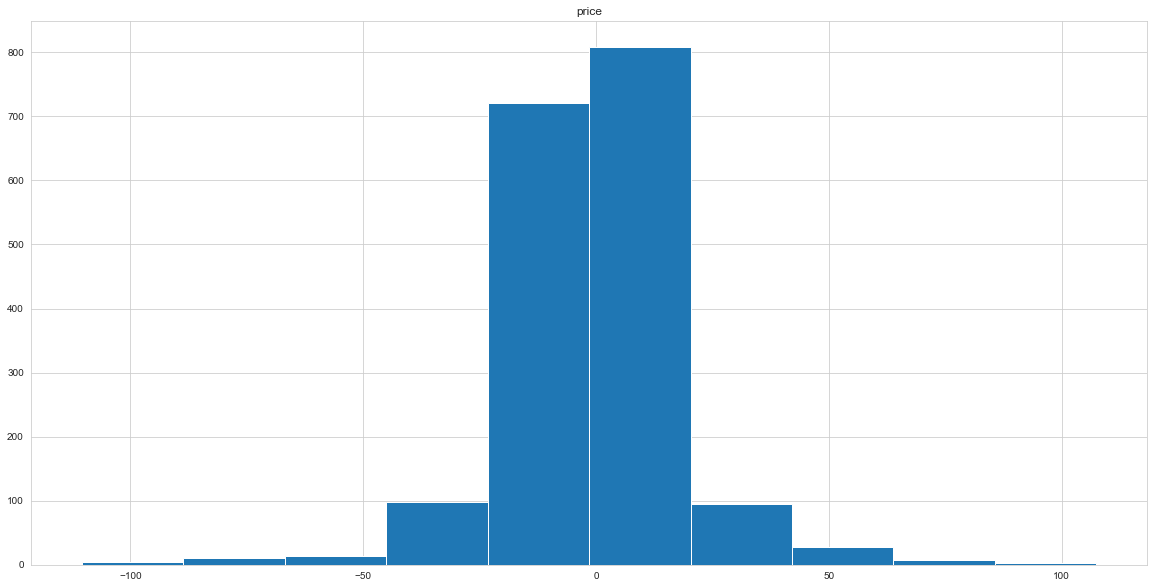

In [108]:
er=y_test-y_pred
e=pd.DataFrame(er)
e.hist()

The residuals seem to form an approximate bell curve

In [109]:
max(er)

107.45904642959778

In [111]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [112]:
cv = KFold(n_splits=20, random_state=1, shuffle=True)
model = LinearRegression()
scores = cross_val_score(model, X_scaled, y, scoring='r2',
                         cv=cv, n_jobs=-1)

In [113]:
scores

array([0.83007445, 0.89345343, 0.81780887, 0.83826491, 0.82917277,
       0.85070279, 0.85723392, 0.80640828, 0.82766373, 0.82783023,
       0.8249659 , 0.81767827, 0.88486285, 0.78597858, 0.82416957,
       0.87542957, 0.8487864 , 0.81589019, 0.83801391, 0.82522877])

In [114]:
scores.mean()

0.8359808695074804

In [115]:
cv = KFold(n_splits=20, random_state=1, shuffle=True)
model = LinearRegression()
scores = cross_val_score(model, X_scaled, y, scoring='r2',
                         cv=cv, n_jobs=-1)

In [116]:
scores

array([0.83007445, 0.89345343, 0.81780887, 0.83826491, 0.82917277,
       0.85070279, 0.85723392, 0.80640828, 0.82766373, 0.82783023,
       0.8249659 , 0.81767827, 0.88486285, 0.78597858, 0.82416957,
       0.87542957, 0.8487864 , 0.81589019, 0.83801391, 0.82522877])

In [117]:
scores.mean()

0.8359808695074804

# Checking p values of features

In [118]:
import statsmodels.api as sm
def regression_results(x,y):
    x=sm.add_constant(x)
    model=sm.OLS(y,x).fit()
    print(model.summary())

In [119]:
X_s=pd.DataFrame(X_scaled,columns=X.columns,index=X.index)

In [120]:
regression_results(X_s,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     89.86
Date:                Sat, 18 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:31:54   Log-Likelihood:                -30207.
No. Observations:                7145   AIC:                         6.137e+04
Df Residuals:                    6668   BIC:                         6.465e+04
Df Model:                         476                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

# Ridge and Lasso Regression

In [121]:
from sklearn import linear_model

In [122]:
a=np.linspace(0.2,1,5)
a

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [123]:
s_r=[]
s_l=[]
for i in a:
    ridge=linear_model.Ridge(alpha=i)
    lasso=linear_model.Lasso(alpha=i)
    ridge.fit(X_train,y_train)
    lasso.fit(X_train,y_train)
    s1=ridge.score(X_test,y_test)
    s2=lasso.score(X_test,y_test)
    s_r.append(s1)
    s_l.append(s2)

In [124]:
s_r

[0.8195008106344455,
 0.8213675579749774,
 0.8220776233887778,
 0.8221132576286814,
 0.8217326952235888]

In [125]:
s_l

[0.6755433708081923,
 0.6384270105822,
 0.624162196303568,
 0.6085036806331046,
 0.5883738241638042]

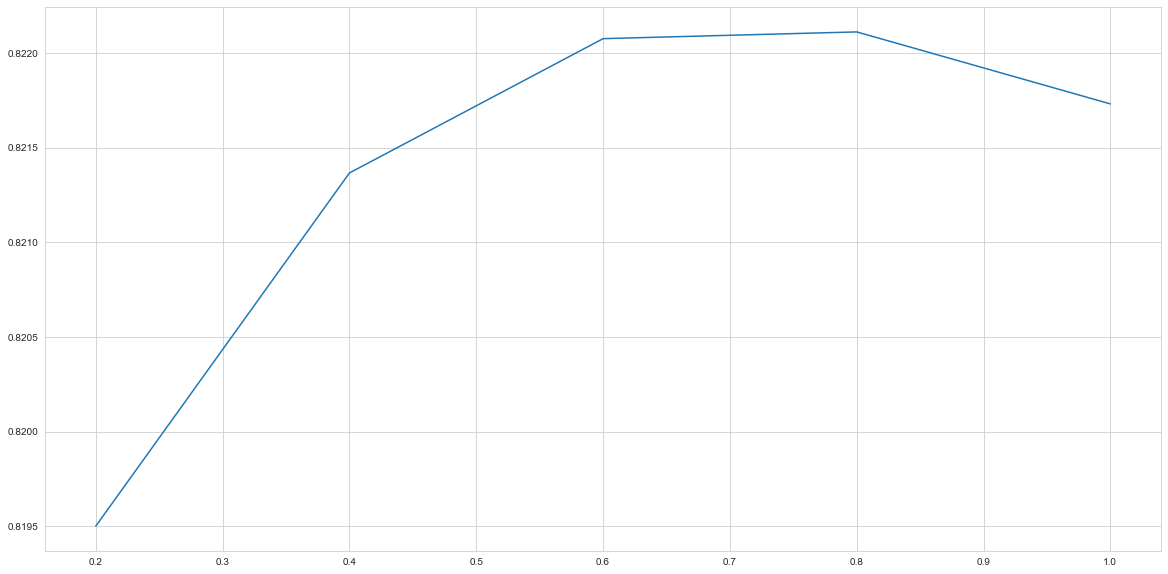

In [126]:
plt.plot(a,s_r)

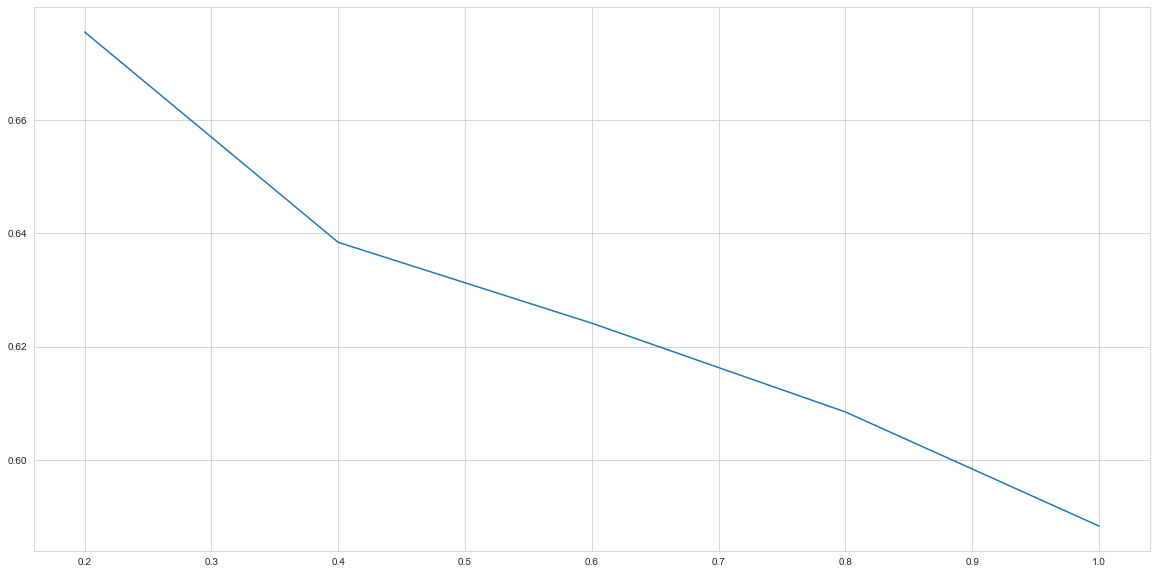

In [147]:
plt.plot(a,s_l)

# DecisionTreeRegression

In [131]:
from sklearn.tree import DecisionTreeRegressor

In [138]:
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.7160405536795623

In [133]:
#gridsearchcv to find the best parameters for Decision Tree Regression
dt=DecisionTreeRegressor()
from sklearn.model_selection import GridSearchCV 
params={'max_depth':list(range(6,12)),'max_leaf_nodes':list(range(10,18)),
        'min_samples_leaf':list(range(10,16)),'min_samples_split':list(range(10,16))}
clf = GridSearchCV(dt, params)
clf.best_params_

{'max_depth': 6,
 'max_leaf_nodes': 17,
 'min_samples_leaf': 15,
 'min_samples_split': 10}

In [139]:
dt1=clf.best_estimator_

In [141]:
dt1.score(X_test,y_test)

0.6688909936037968

Our Decision Tree performed worse after we had tuned the Hyperparameters. This may be possible due to overfitting

# KNNRegressor

In [142]:
from sklearn.neighbors import KNeighborsRegressor

In [143]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.5771053990162913

In [145]:
scores=[]
for i in range(50,0,-1):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    s=knn.score(X_test,y_test)
    scores.append(s)

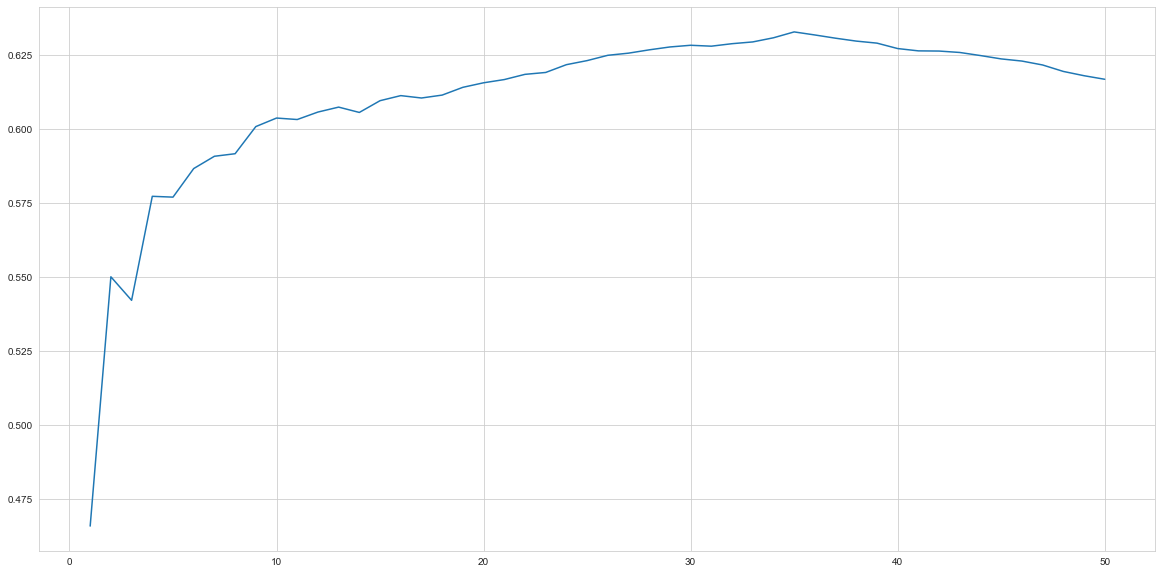

In [146]:
plt.plot(range(50,0,-1),scores)

As model complexity increases, the score starts rising but after a certain point it starts falling

# Random Forest Regressor

In [150]:
from sklearn.ensemble import RandomForestRegressor

In [151]:
dt1

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=17, min_samples_leaf=15,
                      min_samples_split=10)

In [152]:
rf=RandomForestRegressor(max_depth=6, max_leaf_nodes=17, min_samples_leaf=15,min_samples_split=10)

In [153]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, max_leaf_nodes=17, min_samples_leaf=15,
                      min_samples_split=10)

In [154]:
rf.score(X_test,y_test)

0.6782894689523519

In [157]:
score=[]
for i in range(10,100,1):
    rf=RandomForestRegressor(max_depth=6, max_leaf_nodes=17, min_samples_leaf=15,min_samples_split=10,n_estimators=i)
    rf.fit(X_train,y_train)
    s=rf.score(X_test,y_test)
    score.append(s)

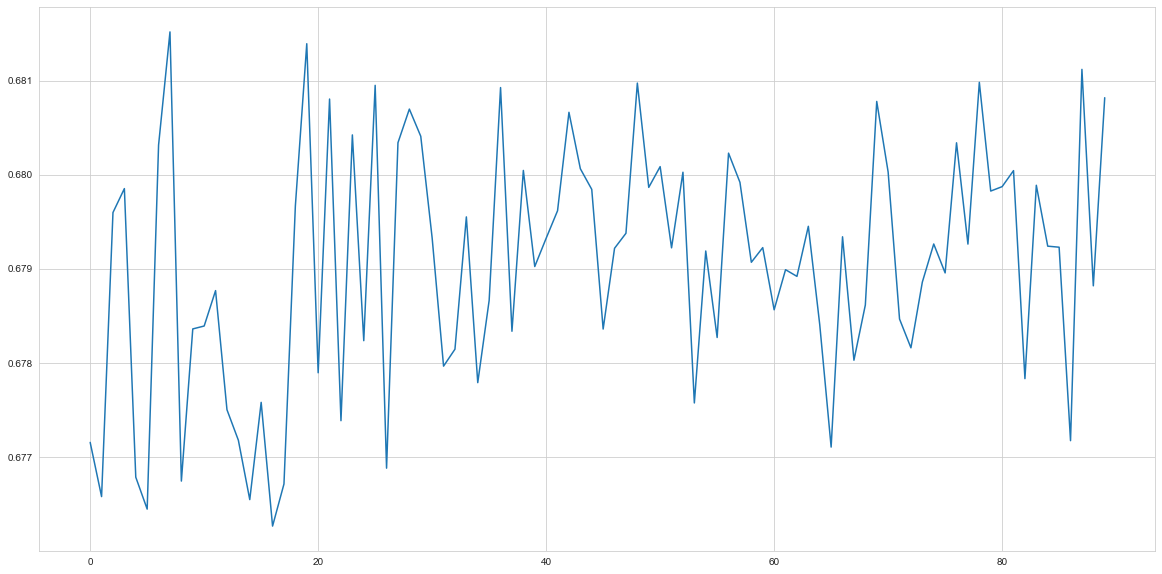

In [158]:
plt.plot(score)

We used 4 models-Linear Regression,Ridge and Lasso Regression,DecisionTree Regression,KNN Regression and RandomForestRegression.
Out of them LinearRegression and Ridge Regression gave the best results while KNNRegression gave the worst results. Decision Tree with best parameters and RandomForest with same base parameters gave similar results